In [1]:
#pip install --user pycaret
# restart Kernel after installation

# Binary Classification

Binary classification is a supervised machine learning technique where the goal is to predict categorical class labels which are discrete and unoredered such as Pass/Fail, Positive/Negative, Default/Not-Default etc. A few real world use cases for classification are listed below:

Medical testing to determine if a patient has a certain disease or not - the classification property is the presence of the disease.
A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.
Information retrieval, namely deciding whether a page or an article should be in the result set of a search or not – the classification property is the relevance of the article, or the usefulness to the user.

# Overview of the Classification Module in PyCaret

PyCaret's classification module (pycaret.classification) is a supervised machine learning module which is used for classifying the elements into a binary group based on various techniques and algorithms. Some common use cases of classification problems include predicting customer default (yes or no), customer churn (customer will leave or stay), disease found (positive or negative).

The PyCaret classification module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

# Dataset for the Tutorial

For this tutorial we will use a dataset from UCI called Default of Credit Card Clients Dataset. This dataset contains information on default payments, demographic factors, credit data, payment history, and billing statements of credit card clients in Taiwan from April 2005 to September 2005. There are 24,000 samples and 25 features. Short descriptions of each column are as follows:

**ID**: ID of each client

**LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit)

**SEX:** Gender (1=male, 2=female)

**EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

**MARRIAGE:** Marital status (1=married, 2=single, 3=others)

**AGE:** Age in years

**PAY_0 to PAY_6:** Repayment status by n months ago (PAY_0 = last month ... PAY_6 = 6 months ago) (Labels: -1=pay duly, 1=payment 
delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

**BILL_AMT1 to BILL_AMT6:** Amount of bill statement by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)

**PAY_AMT1 to PAY_AMT6:** Amount of payment by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)

**default:** Default payment (1=yes, 0=no) Target Column


## Download the data

In [2]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
#check the shape of data
dataset.shape

(24000, 24)


In order to demonstrate the predict_model() function on unseen data, a sample of 1200 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 1200 records are not available at the time when the machine learning experiment was performed.

In [4]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


# Setting up Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [5]:
from pycaret.classification import *

In [6]:
exp_clf101 = setup(data = data, target = 'default', session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. 

**session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

**Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

**Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric.

**Original Data** : Displays the original shape of the dataset. In this experiment (22800, 24) means 22,800 samples and 24 features including the target column.

**Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

**Numeric Features** : The number of features inferred as numeric. In this dataset, 14 out of 24 features are inferred as numeric.

**Categorical Features** : The number of features inferred as categorical. In this dataset, 9 out of 24 features are inferred as categorical.

**Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (22800, 24) is transformed into (15959, 91) for the transformed train set and the number of features have increased to 91 from 24 due to categorical encoding

**Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 6841 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation (in this case there are no missing values in the training data, but we still need imputers for unseen data), categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.

# Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.8236,0.0000,0.3646,0.6932,0.4776,0.3836,0.4124,0.0366
1,Linear Discriminant Analysis,0.8236,0.7703,0.3813,0.6818,0.4888,0.3923,0.4167,0.2001
2,Light Gradient Boosting Machine,0.8231,0.7854,0.3895,0.6738,0.4934,0.3954,0.4173,0.2789
3,Gradient Boosting Classifier,0.8225,0.7888,0.3652,0.6868,0.4765,0.3815,0.4093,5.9198
4,CatBoost Classifier,0.8203,0.7882,0.3839,0.6626,0.4859,0.3862,0.4075,13.6524
5,Ada Boost Classifier,0.8185,0.7783,0.3507,0.6729,0.4607,0.3644,0.3926,1.5229
6,Extreme Gradient Boosting,0.8146,0.7670,0.3822,0.6349,0.4767,0.3726,0.3905,2.2040
7,Random Forest Classifier,0.8093,0.7401,0.3363,0.6295,0.4382,0.3359,0.3600,0.1146
8,Extra Trees Classifier,0.8091,0.7501,0.3841,0.6083,0.4707,0.3615,0.3758,0.7266
9,Quadratic Discriminant Analysis,0.7893,0.7395,0.1734,0.6279,0.2380,0.1700,0.2317,0.0612


compare_models(sort = 'Recall') will sort the grid by Recall instead of Accuracy.

to change the fold parameter from the default value of 10 to a different value then you can use the fold parameter. For example compare_models(fold = 5) will compare all models on 5 fold cross validation. 

In [8]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


# Create a Model


create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold.

In [9]:
#There are 18 classifiers available in the model library of PyCaret. To see list of all classifiers either check the docstring or use models function to see the library.

models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


## Decision Tree Classifier

In [10]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7224,0.6109,0.4108,0.3816,0.3956,0.2158,0.2160
1,0.7199,0.6225,0.4448,0.3848,0.4126,0.2300,0.2310
2,0.7400,0.6310,0.4363,0.4162,0.4260,0.2580,0.2582
3,0.7262,0.6094,0.3966,0.3846,0.3905,0.2140,0.2140
4,0.7306,0.6090,0.3909,0.3909,0.3909,0.2180,0.2180
5,0.7331,0.6381,0.4646,0.4090,0.4350,0.2612,0.2621
6,0.7155,0.6137,0.4306,0.3753,0.4011,0.2157,0.2166
7,0.7462,0.6363,0.4391,0.4282,0.4336,0.2701,0.2701
8,0.7318,0.6209,0.4221,0.3995,0.4105,0.2371,0.2372
9,0.7354,0.6194,0.4079,0.4034,0.4056,0.2355,0.2355


In [11]:
#trained model object is stored in the variable 'dt'. 

print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


## Random Forest

In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.7531,0.3428,0.6269,0.4432,0.3400,0.3626
1,0.8127,0.7451,0.3399,0.6452,0.4453,0.3453,0.3710
2,0.8076,0.7714,0.3258,0.6250,0.4283,0.3262,0.3512
3,0.7989,0.7185,0.3144,0.5842,0.4088,0.3006,0.3215
4,0.8051,0.7249,0.3229,0.6129,0.4230,0.3191,0.3428
5,0.8152,0.7324,0.3569,0.6495,0.4607,0.3603,0.3839
6,0.8039,0.7244,0.3371,0.6010,0.4319,0.3246,0.3444
7,0.8158,0.7711,0.3399,0.6630,0.4494,0.3523,0.3807
8,0.8139,0.7183,0.3258,0.6609,0.4364,0.3400,0.3706
9,0.8107,0.7419,0.3569,0.6269,0.4549,0.3506,0.3710


## K Neighbors Classifier

In [13]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7412,0.5881,0.1671,0.3315,0.2222,0.0868,0.0941
1,0.7350,0.5787,0.1473,0.2989,0.1973,0.0601,0.0655
2,0.7632,0.6641,0.2096,0.4277,0.2814,0.1590,0.1735
3,0.7462,0.5982,0.1530,0.3375,0.2105,0.0842,0.0936
4,0.7550,0.6096,0.2040,0.3956,0.2692,0.1397,0.1508
5,0.7607,0.6200,0.1841,0.4088,0.2539,0.1351,0.1504
6,0.7406,0.5884,0.1700,0.3315,0.2247,0.0880,0.0951
7,0.7600,0.6139,0.1898,0.4085,0.2592,0.1383,0.1528
8,0.7487,0.6106,0.1898,0.3681,0.2505,0.1177,0.1270
9,0.7542,0.6254,0.1870,0.3860,0.2519,0.1256,0.1374


In [14]:
#to change the fold parameter from the default value of 10 to a different value 

knn_5 = create_model('knn', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7346,0.5830,0.1530,0.3025,0.2032,0.0642,0.0695
1,0.7509,0.6236,0.1856,0.3732,0.2479,0.1184,0.1288
2,0.7556,0.6156,0.1926,0.3931,0.2586,0.1323,0.1444
3,0.7478,0.5998,0.1657,0.3514,0.2252,0.0972,0.1070
4,0.7587,0.6142,0.2068,0.4101,0.2750,0.1487,0.1612
Mean,0.7495,0.6072,0.1807,0.3661,0.2420,0.1122,0.1222
SD,0.0083,0.0143,0.0192,0.0373,0.0252,0.0293,0.0318


# Tune a Model


When a model is created using the create_model() function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the tune_model() function is used. This function automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. 


## Tune Decision Tree Classifier

In [15]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8271,0.7213,0.3258,0.7516,0.4545,0.3703,0.4162
1,0.8208,0.7211,0.3031,0.7279,0.4280,0.3425,0.3889
2,0.8120,0.7155,0.3484,0.6373,0.4505,0.3487,0.3719
3,0.8114,0.7089,0.2691,0.6884,0.3870,0.2999,0.3463
4,0.8195,0.6942,0.2975,0.7241,0.4217,0.3362,0.3831
5,0.8239,0.7059,0.3031,0.7535,0.4323,0.3498,0.4008
6,0.8095,0.7130,0.2663,0.6763,0.3821,0.2939,0.3387
7,0.8271,0.7433,0.2918,0.7984,0.4274,0.3505,0.4124
8,0.8164,0.7094,0.2720,0.7273,0.3959,0.3132,0.3661
9,0.8150,0.6921,0.3626,0.6465,0.4646,0.3633,0.3856


In [16]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=76, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


To use the custom search grid, you can pass custom_grid parameter in the tune_model function (see 9.2 KNN tuning below).

## Tune KNearest Neighbors

In [17]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7788,0.6377,0.0567,0.5000,0.1018,0.0594,0.1077
1,0.7807,0.6641,0.0397,0.5600,0.0741,0.0462,0.1030
2,0.7820,0.6994,0.0595,0.5676,0.1077,0.0686,0.1286
3,0.7813,0.6431,0.0510,0.5625,0.0935,0.0589,0.1176
4,0.7782,0.6417,0.0482,0.4857,0.0876,0.0497,0.0954
5,0.7838,0.6777,0.0680,0.6000,0.1221,0.0807,0.1463
6,0.7845,0.6421,0.0312,0.8462,0.0601,0.0451,0.1365
7,0.7776,0.6625,0.0567,0.4762,0.1013,0.0569,0.1010
8,0.7719,0.6287,0.0340,0.3429,0.0619,0.0229,0.0439
9,0.7768,0.6666,0.0425,0.4545,0.0777,0.0414,0.0817


In [18]:

print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=46, p=2,
                     weights='uniform')


## Tune Random Forest Classifier

In [19]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8258,0.7863,0.3654,0.7049,0.4813,0.3891,0.4194
1,0.8227,0.7977,0.3541,0.6944,0.4690,0.3758,0.4066
2,0.8233,0.8225,0.3853,0.6766,0.4910,0.3937,0.4165
3,0.8177,0.7713,0.3598,0.6615,0.4661,0.3675,0.3923
4,0.8227,0.7805,0.3513,0.6966,0.4670,0.3743,0.4059
5,0.8227,0.7955,0.3683,0.6842,0.4788,0.3834,0.4101
6,0.8158,0.7568,0.3371,0.6648,0.4474,0.3507,0.3799
7,0.8377,0.7941,0.3768,0.7733,0.5067,0.4231,0.4623
8,0.8227,0.7671,0.3569,0.6923,0.4710,0.3773,0.4073
9,0.8138,0.7833,0.3654,0.6386,0.4649,0.3621,0.3828


##### By default, tune_model optimizes Accuracy but this can be changed using optimize parameter. For example: tune_model(dt, optimize = 'AUC') will search for the hyperparameters of a Decision Tree Classifier that results in the highest AUC instead of Accuracy.

In [20]:
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8258,0.7863,0.3654,0.7049,0.4813,0.3891,0.4194
1,0.8227,0.7977,0.3541,0.6944,0.4690,0.3758,0.4066
2,0.8233,0.8225,0.3853,0.6766,0.4910,0.3937,0.4165
3,0.8177,0.7713,0.3598,0.6615,0.4661,0.3675,0.3923
4,0.8227,0.7805,0.3513,0.6966,0.4670,0.3743,0.4059
5,0.8227,0.7955,0.3683,0.6842,0.4788,0.3834,0.4101
6,0.8158,0.7568,0.3371,0.6648,0.4474,0.3507,0.3799
7,0.8377,0.7941,0.3768,0.7733,0.5067,0.4231,0.4623
8,0.8227,0.7671,0.3569,0.6923,0.4710,0.3773,0.4073
9,0.8138,0.7833,0.3654,0.6386,0.4649,0.3621,0.3828


# Plot a Model
Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are 15 different plots available, please see the plot_model() docstring for the list of available plots.

## AUC Plot

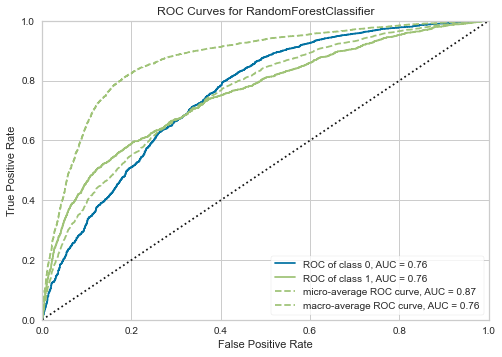

In [21]:
plot_model(tuned_rf, plot = 'auc')

## Precision-Recall Curve

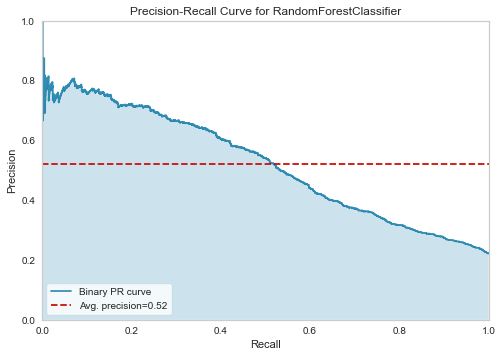

In [22]:
plot_model(tuned_rf, plot = 'pr')

## Feature Importance Plot

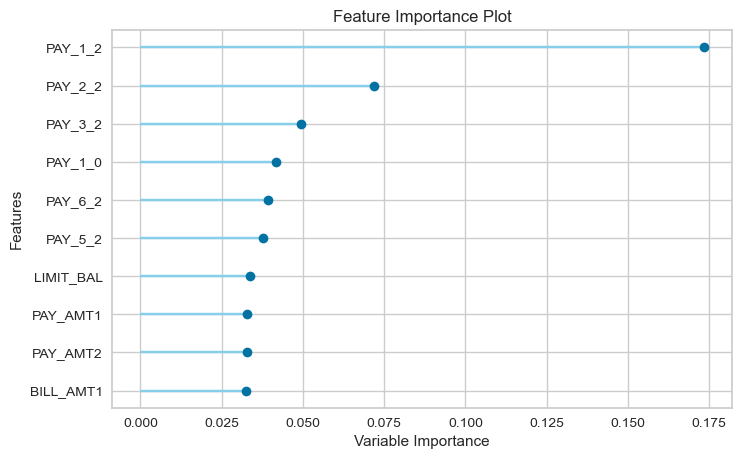

In [23]:
plot_model(tuned_rf, plot='feature')

## Confusion Matrix

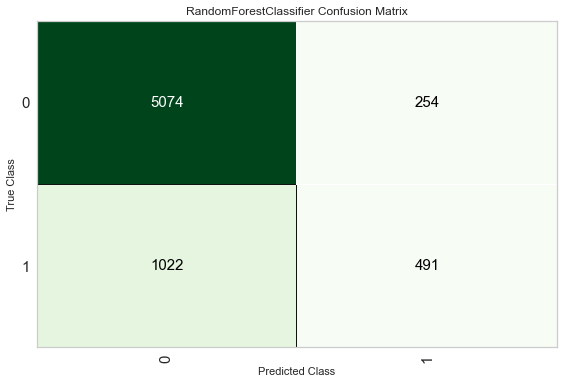

In [24]:
plot_model(tuned_rf, plot = 'confusion_matrix')

Another way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [25]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (6,841 samples) of the data has been separated out as test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the tuned_rf variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results

In [27]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8135,0.7563,0.3245,0.6591,0.4349,0.3383,0.3688


The accuracy on test/hold-out set is 0.8135 compared to 0.8225 achieved on the tuned_rf CV results (in section 9.3 above). This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 5% that we had separated in the beginning and never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using create_model().)

# Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [28]:
final_rf = finalize_model(tuned_rf)

In [29]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


Caution: One final word of caution. Once the model is finalized using finalize_model(), the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after finalize_model() is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use final_rf under predict_model() to compare the information grid with the one above in section 11.

In [30]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8345,0.8222,0.3629,0.7657,0.4924,0.4082,0.4489


Notice how the AUC in final_rf has increased to 0.8222 from 0.7563, even though the model is the same. This is because the final_rf variable has been trained on the complete dataset including the test/hold-out set.

# Predict on unseen data

The predict_model() function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning of the tutorial and contains 5% (1200 samples) of the original dataset which was never exposed to PyCaret

In [32]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.1891
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.0481
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.1685
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7434
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.2173


The Label and Score columns are added onto the data_unseen set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics on this since you have actual target column default available. To do that we will use pycaret.utils module.

In [39]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.default, unseen_predictions['Label'].astype(int), 'Accuracy')

0.8125

# Saving the model

We have now finished the experiment by finalizing the tuned_rf model which is now stored in final_rf variable. We have also used the model stored in final_rf to predict data_unseen. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

In [41]:
save_model(final_rf,'Final RF Model 24Oct2020')

Transformation Pipeline and Model Succesfully Saved



Once the model is loaded in the environment, you can simply use it to predict on any new data using the same predict_model() function. Below we have applied the loaded model to predict the same data_unseen that we used in section 13 above

# Loading the saved model

In [46]:
Saved_final_rf = load_model('Final RF Model 24Oct2020')

Transformation Pipeline and Model Successfully Loaded


In [48]:
new_prediction = predict_model(Saved_final_rf, data=data_unseen)

In [50]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.1891
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.0481
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.1685
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7434
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.2173


In [51]:
from pycaret.utils import check_metric
check_metric(new_prediction.default, new_prediction['Label'].astype(int), 'Accuracy')

0.8125

###### This tutorial has covered the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all of these steps in less than 10 commands which are naturally constructed and very intuitive to remember such as create_model(), tune_model(), compare_models(). Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code in most libraries.